In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

total_data = pd.DataFrame()

for i in range(2, 8):
  data = pd.read_csv('/content/drive/MyDrive/data/국민연금 가입 사업장 내역 2021년 '+str(i)+'월.csv', encoding = 'cp949')

  new_cols = []

  for w in data.columns:
    new_col = w.strip()
    new_cols.append(new_col)

  data.columns = new_cols

  if i<7:
    data.drop(['사업자등록번호', '사업장가입상태코드 1:등록2:탈퇴', '우편번호', '사업장도로명상세주소', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드', '법정동주소광역시시군구읍면동코드',
              '사업장업종코드', '사업장업종코드명', '적용일자', '재등록일자', '탈퇴일자'], axis = 1, inplace = True)
    data.columns = ['기준월', '회사명', '주소', '법정동코드', '사업형태', '인원수', '당월고지금액', '신규자수', '탈퇴자수']

  else:
    data.drop(['사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '우편번호', '사업장도로명상세주소', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드', '법정동주소광역시시군구읍면동코드',
              '사업장업종코드', '사업장업종코드명', '적용일자', '재등록일자', '탈퇴일자'], axis = 1, inplace = True)
    data.columns = ['기준월', '회사명', '주소', '법정동코드', '사업형태', '인원수', '당월고지금액', '신규자수', '탈퇴자수']
  
  total_data = pd.concat([total_data, data])

total_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,기준월,회사명,주소,법정동코드,사업형태,인원수,당월고지금액,신규자수,탈퇴자수
0,2021-01,우성기전(주),경기도 광주시 도척면,4161033025,1,5,792720,0,0
1,2021-01,서능공원묘지운영회(재),경기도 포천시 내촌면,4165032022,1,11,3069400,0,0
2,2021-01,노들새마을금고,서울특별시 동작구 노량진동,1159010100,1,13,4408620,0,0
3,2021-01,유창성업(주),인천광역시 서구 오류동,2826011900,1,26,5278560,0,0
4,2021-01,희성전자(주),서울특별시 용산구 한남동,1117013100,1,468,197764260,0,4


In [60]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164963 entries, 0 to 534124
Data columns (total 9 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   기준월     object
 1   회사명     object
 2   주소      object
 3   법정동코드   int64 
 4   사업형태    int64 
 5   인원수     int64 
 6   당월고지금액  int64 
 7   신규자수    int64 
 8   탈퇴자수    int64 
dtypes: int64(6), object(3)
memory usage: 241.5+ MB


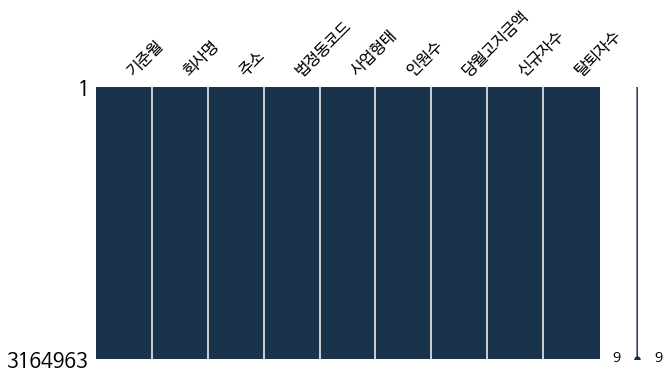

In [61]:
import missingno as msno

msno.matrix(total_data, color=(0.1, 0.2, 0.3), figsize = (10,5))

- Null 값은 없다 

In [62]:
total_data.reset_index(drop = True, inplace = True)

In [63]:
total_data.groupby(['기준월'])['신규자수'].describe()

,count,mean,std,min,25%,50%,75%,max
기준월,,,,,,,,
2021-01,530596.0,0.891117,13.492317,0.0,0.0,0.0,0.0,5840.0
2021-02,525747.0,0.941143,11.726401,0.0,0.0,0.0,1.0,5076.0
2021-03,518004.0,0.886999,8.537295,0.0,0.0,0.0,1.0,2698.0
2021-04,527270.0,1.080824,12.582808,0.0,0.0,0.0,1.0,4840.0
2021-05,529221.0,0.822807,10.253237,0.0,0.0,0.0,1.0,4534.0
2021-06,534125.0,0.877864,9.466763,0.0,0.0,0.0,1.0,3912.0


In [64]:
total_data.groupby(['기준월'])['탈퇴자수'].describe()

,count,mean,std,min,25%,50%,75%,max
기준월,,,,,,,,
2021-01,530596.0,0.646149,21.034608,0.0,0.0,0.0,0.0,13957.0
2021-02,525747.0,0.851569,11.054090,0.0,0.0,0.0,1.0,5681.0
2021-03,518004.0,0.765455,11.324954,0.0,0.0,0.0,1.0,4786.0
2021-04,527270.0,0.684076,8.530019,0.0,0.0,0.0,1.0,3787.0
2021-05,529221.0,0.650996,7.268774,0.0,0.0,0.0,0.0,3214.0
2021-06,534125.0,0.751811,9.137947,0.0,0.0,0.0,1.0,4092.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


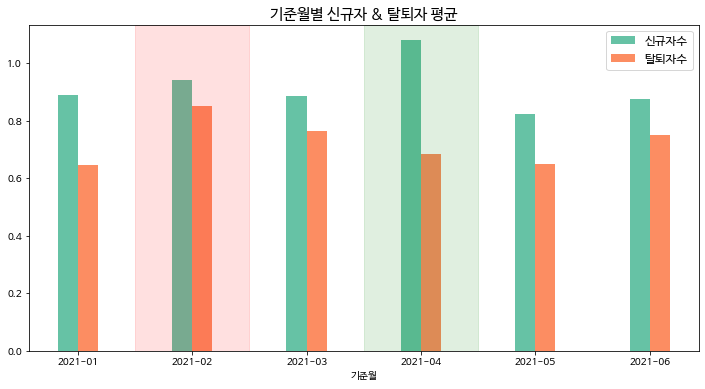

In [65]:
sns.set_palette('Set2')

f, ax = plt.subplots(figsize = (12,6))

total_data.groupby(['기준월'])['신규자수', '탈퇴자수'].mean().reset_index().plot(kind = 'bar', ax = ax, x = '기준월', width = 0.35)

plt.axvspan(0.5, 1.5, color = 'red', alpha = 0.12) 
plt.axvspan(2.5, 3.5, color = 'green', alpha = 0.12)

plt.xticks(rotation = 0)
plt.title('기준월별 신규자 & 탈퇴자 평균', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

- 신규자수는 상반기 채용이 한창일 4월에 가장 많이 늘어난다. 탈퇴자(퇴사자)는 주로 상반기 채용전 2월에 많이 나타나는 것을 알 수 있다.
- 위의 describe를 살펴보면 신규자수와 탈퇴자수가 평균과 많이 차이나므로 기업들마다 인원수가 상당히 다르다

In [66]:
total_data.groupby(['기준월'])['신규자수'].max()

기준월
2021-01    5840
2021-02    5076
2021-03    2698
2021-04    4840
2021-05    4534
2021-06    3912
Name: 신규자수, dtype: int64

In [67]:
total_data.iloc[total_data.groupby(['기준월'])['신규자수'].idxmax().to_list()]

,기준월,회사명,주소,법정동코드,사업형태,인원수,당월고지금액,신규자수,탈퇴자수
397609,2021-01,쿠팡풀필먼트서비스 유한회사,서울특별시 송파구 신천동,1171010200,1,13960,691146260,5840,13957
927753,2021-02,쿠팡풀필먼트서비스 유한회사,서울특별시 송파구 신천동,1171010200,1,14236,864660740,5076,5681
1336621,2021-03,주식회사 컬리,서울특별시 강남구 논현동,1168010800,1,3873,668693260,2698,758
1583586,2021-04,(주)에이디티캡스,경기도 성남시 분당구 삼평동,4113510900,1,6460,2033718920,4840,81
2294753,2021-05,한국문화예술교육진흥원,서울특별시 마포구 상암동,1144012700,1,4535,509706420,4534,3
3020049,2021-06,쿠팡풀필먼트서비스 유한회사,서울특별시 송파구 신천동,1171010200,1,12475,1766136200,3912,4092


- 월별로 신규자수가 가장 많은 회사들을 뽑아봤다.
- 1월, 2월, 6월에 '쿠팡풀필먼트서비스 유한회사'가 가장 신규자수가 많았다.
- 신기한건 한국문화예술교육진흥원이 5월에 4534명이나 신규자수로 등록이 되었다. 진흥원은 공공기관의 특성을 띄고있어서 신규채용이 4000명이나 되지 않을거같은데 국민연금으로 새로 가입된 사람들이 4500여명이나 된다.	

In [68]:
total_data.groupby(['기준월'])['탈퇴자수'].max()

기준월
2021-01    13957
2021-02     5681
2021-03     4786
2021-04     3787
2021-05     3214
2021-06     4092
Name: 탈퇴자수, dtype: int64

In [69]:
total_data.iloc[total_data.groupby(['기준월'])['탈퇴자수'].idxmax().to_list()]

,기준월,회사명,주소,법정동코드,사업형태,인원수,당월고지금액,신규자수,탈퇴자수
397609,2021-01,쿠팡풀필먼트서비스 유한회사,서울특별시 송파구 신천동,1171010200,1,13960,691146260,5840,13957
927753,2021-02,쿠팡풀필먼트서비스 유한회사,서울특별시 송파구 신천동,1171010200,1,14236,864660740,5076,5681
1059037,2021-03,(주)에이디티캡스,서울특별시 강남구 삼성동,1168010500,1,4786,1531886680,55,4786
1968077,2021-04,쿠팡풀필먼트서비스 유한회사,서울특별시 송파구 신천동,1171010200,1,11684,709549960,4266,3787
2492610,2021-05,쿠팡풀필먼트서비스 유한회사,서울특별시 송파구 신천동,1171010200,1,11777,715182600,3880,3214
3020049,2021-06,쿠팡풀필먼트서비스 유한회사,서울특별시 송파구 신천동,1171010200,1,12475,1766136200,3912,4092


- 탈퇴자수이다. 위에서 봤듯이 '쿠팡풀필먼트서비스 유한회사'가 신규자로 많이 등록이 되었는데 원인?이라고 봐야할까 탈퇴자수가 엄청 많다. 그래서 신규로 많이 채용하는것 같다.

- 찾아보니 '쿠팡풀필먼트서비스 유한회사'는 쿠팡의 물류창고? 같은 역할을 한다고 한다. 그러다보니 사람이 많이 필요해 주기적으로 계약직 채용이 대규모로 많이 일어난다고 한다.

In [70]:
total_data['인당월급'] = total_data['당월고지금액']/total_data['인원수']/9*100
total_data.head()

,기준월,회사명,주소,법정동코드,사업형태,인원수,당월고지금액,신규자수,탈퇴자수,인당월급
0,2021-01,우성기전(주),경기도 광주시 도척면,4161033025,1,5,792720,0,0,1.761600e+06
1,2021-01,서능공원묘지운영회(재),경기도 포천시 내촌면,4165032022,1,11,3069400,0,0,3.100404e+06
2,2021-01,노들새마을금고,서울특별시 동작구 노량진동,1159010100,1,13,4408620,0,0,3.768051e+06
3,2021-01,유창성업(주),인천광역시 서구 오류동,2826011900,1,26,5278560,0,0,2.255795e+06
4,2021-01,희성전자(주),서울특별시 용산구 한남동,1117013100,1,468,197764260,0,4,4.695258e+06


- 당월고지금액이 그 회사의 국민연금 고지금액이니까 인원수로 나누면 1인당 고지금액이 나온다.
- 보통 국민연금은 본인이 4.5% 회사가 4.5%를 가져가서 총 9%를 납부하게 된다.
- 1인당 고지금액/9*100을 하면 국민연금 기준 1인당 평균 월급이 산출된다.(상한가가 있으므로 100%맞는 월급은 아니다. 추정치에 불과하니 참고용으로만 쓰자)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


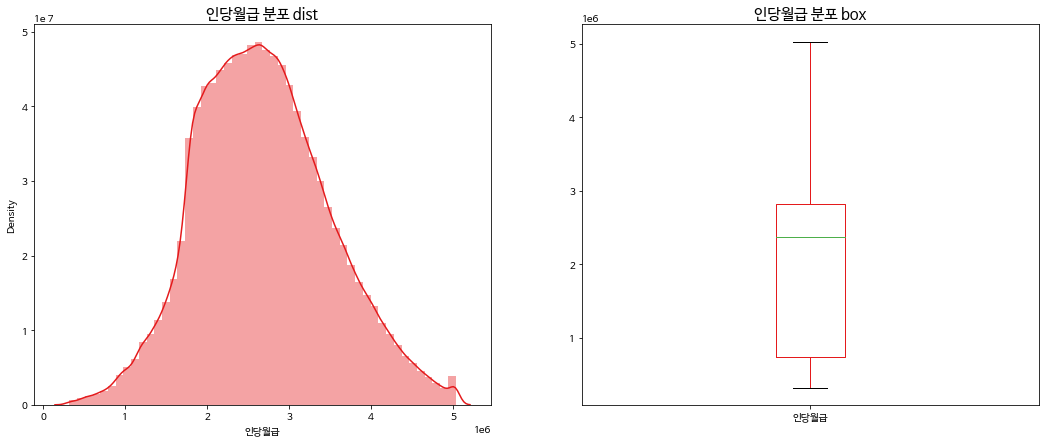

In [71]:
sns.set_palette('Set1')
f, ax = plt.subplots(1,2, figsize = (18,7))

sns.distplot(total_data[total_data['기준월']=='2021-06']['인당월급'], ax = ax[0])
total_data[total_data['기준월']=='2021-06']['인당월급'].describe().plot(kind = 'box', ax = ax[1])

ax[0].set_title('인당월급 분포 dist', fontsize = 15)
ax[1].set_title('인당월급 분포 box', fontsize = 15)
plt.show()

- 데이터가 너무 많은 관계로 6개월치중 가장 최근인 2021년 6월 데이터를 토대로 월급 분포를 그려봤다.
- 정규분포형에 가까운 분포를 띄고 평균적으로 200 ~ 300만원 사이에 몰려있다.

In [72]:
total_data.groupby(['회사명'])['인당월급', '인원수'].mean().reset_index().sort_values(by = '인당월급', ascending = False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,회사명,인당월급,인원수
574068,청우종합건설（주）/일용/서하리 구거정비사업,5030000.0,3.000000
640617,（주）블루엠테크놀러지,5030000.0,3.000000
441762,주식회사동아유리/일용/검단4초등학교 신축공사 중 유리공사,5030000.0,3.000000
248120,벙글코리아주식회사(VungleKoreaCo. Ltd.),5030000.0,8.000000
651640,（주）에이치앤인터내셔날,5030000.0,4.000000
381254,주식회사 가이아에이펙,5030000.0,3.000000
270778,삼환기업（주）/상용/청양-부여주배관,5030000.0,5.666667
614589,형주전력주식회사-(상용)2019년 광주전남지역본부 고흥지사 고압A공사,5030000.0,3.000000
129855,(주)케이에프컴스,5030000.0,3.000000
322860,엘레멘트에너지코리아 주식회사,5030000.0,3.333333


- 국민연금 기준으로 인당 월급이 가장 높은 곳 10곳을 뽑아봤는데 역시 상한가 인곳이 대부분이었다.
- 모르는 회사가 대부분이고 대부분 인원수가 엄청 적은 회사들이다
  - 인원수를 적절하게 자른 후에 다시 해보는것도 좋은 방법이겠다

In [73]:
a = total_data.groupby(['회사명'])['인당월급', '인원수'].mean().reset_index()
a[a['인원수']>=100].sort_values(by = '인당월급', ascending = False).head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,회사명,인당월급,인원수
180065,국회사무처,5.030000e+06,170.500000
602212,한국항만물류협회목포,5.029494e+06,278.833333
602208,한국항만물류협회군산,5.029378e+06,273.333333
602231,한국항만물류협회포항,5.028825e+06,775.666667
186127,기아자동차(주)영업본부,5.028403e+06,2766.000000
186098,기아(주) 영업본부,5.027800e+06,2745.000000
100225,(주)우리금융지주,5.027300e+06,154.833333
580641,코리안리재보험(주),5.025256e+06,392.166667
602209,한국항만물류협회당진,5.024952e+06,252.500000
602207,한국항만물류협회광양,5.024416e+06,523.166667


- 임의로 인원수를 100명이상으로 잡고 다시 인당급여로 정렬해보았다
- 이제 우리가 아는 기업들이 눈에 보이기 시작한다. 대부분 500만원 이상이다

In [74]:
!pip install pydeck
!pip install geopandas

MAPBOX_API_KEY = "pk.eyJ1Ijoia2tzcDk4eSIsImEiOiJja3R3djd2Y2wyZTY3MnVvMXRvc2ZyNjNtIn0.zieEbgcfEPeVEHnyeh7FuQ"
!export MAPBOX_API_KEY

import pydeck as pdk
import geopandas as gpd

In [75]:
geo = gpd.read_file('/content/drive/MyDrive/data/대한민국 행정구역/TL_SCCO_EMD.shp', encoding = 'cp949') # 미리 대한민국 행정구역(믑면동) 받음

geo = geo.to_crs(epsg = 4326) # 좌표계가 5179로 되어있는듯하다 우리가 아는 위경도로 표시하겠다(4326) 
geo.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,42110101,Bongui-dong,봉의동,"POLYGON ((127.73311 37.88673, 127.73298 37.885..."
1,42110102,Yoseon-dong,요선동,"POLYGON ((127.72584 37.88242, 127.72587 37.882..."
2,42110103,Nagwon-dong,낙원동,"POLYGON ((127.72327 37.87704, 127.72249 37.876..."
3,42110104,Jungangno 1(il)-ga,중앙로1가,"POLYGON ((127.72991 37.88326, 127.72960 37.883..."
4,42110105,Jungangno 2(i)-ga,중앙로2가,"POLYGON ((127.72439 37.87755, 127.72430 37.877..."


- 지리정보 데이터는 미리 geometry데이터 필요하므로 미리 받아뒀다
- Uber에서 제공하는 pydeck 라이브러리를 활용해서 시각화 해볼 예정이다(처음 사용해서 이것저것 해볼 예정)

In [76]:
geo.rename(columns ={
    'EMD_CD' : '법정동코드'
}, inplace = True)

읍면동 = []
for i in total_data['법정동코드']:
  읍면동.append(int(str(i)[:8])) # 현재 가지고 있는 법정동코드는 '리'까지 구분되어있는 코드이다


geo['법정동코드'] = geo['법정동코드'].astype('int64')
total_data['법정동코드'] = 읍면동

total_data = pd.merge(total_data, geo[['EMD_KOR_NM', '법정동코드', 'geometry']], on = '법정동코드', how = 'inner')
total_data.head()

,기준월,회사명,주소,법정동코드,사업형태,인원수,당월고지금액,신규자수,탈퇴자수,인당월급,EMD_KOR_NM,geometry
0,2021-01,우성기전(주),경기도 광주시 도척면,41610330,1,5,792720,0,0,1.761600e+06,도척면,"POLYGON ((127.27584 37.27429, 127.27592 37.274..."
1,2021-01,삼원정공(주),경기도 광주시 도척면,41610330,1,101,28384880,0,2,3.122649e+06,도척면,"POLYGON ((127.27584 37.27429, 127.27592 37.274..."
2,2021-01,성신우영(주),경기도 광주시 도척면,41610330,1,5,1165920,0,0,2.590933e+06,도척면,"POLYGON ((127.27584 37.27429, 127.27592 37.274..."
3,2021-01,(주)신성,경기도 광주시 도척면,41610330,1,23,6589380,1,1,3.183275e+06,도척면,"POLYGON ((127.27584 37.27429, 127.27592 37.274..."
4,2021-01,예일몰딩(주),경기도 광주시 도척면,41610330,1,8,2304020,0,0,3.200028e+06,도척면,"POLYGON ((127.27584 37.27429, 127.27592 37.274..."


In [106]:
def multipolygon_to_coordinates(x,i):
    lon, lat = x[i].exterior.xy
    return [[x, y] for x, y in zip(lon, lat)]

#total_data['coordinates'] = total_data['geometry'].apply(multipolygon_to_coordinates)
#del total_data['geometry']
a = []
for w in range(len(total_data)):
  b = multipolygon_to_coordinates(total_data['geometry'], w)
  a.append(b)

AttributeError: ignored

- pydeck은 폴리곤으로 되어있으면 인식을 못한다고 한다
  - 연속된 포인트값으로 되어있어야 인식이 된다고 하니 변환해주자


In [ ]:
geo